In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
img_path = '/home/joaolevi/projects/pdi/images/valhala2.webp'

## Create and add noise
### Adding noise to an image

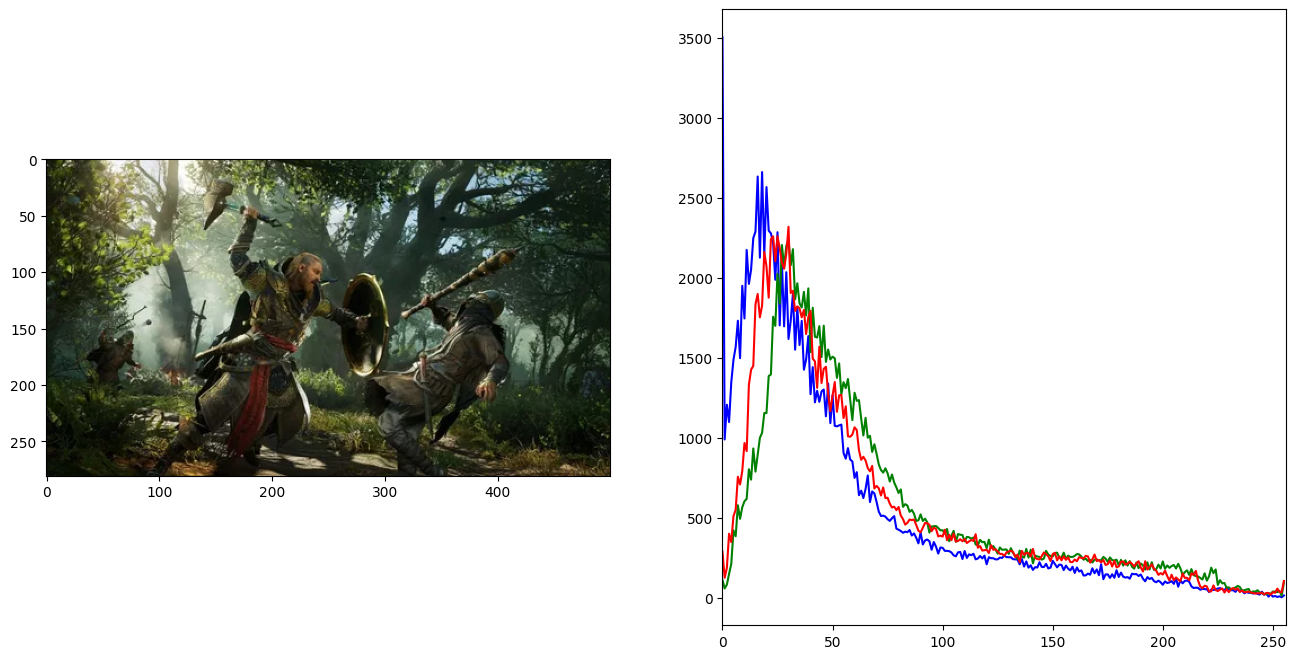

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [4]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.imread(img_path, cv2.IMREAD_COLOR)

color = ('b', 'g', 'r')

plt.figure(figsize=(16,8))
plt.subplot(121), plt.imshow(bgr2rgb(img))
plt.subplot(122)
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

cv2.imshow(img)

Noise (min, max) = -101.32, 93.17
Img2 (min, max) = -77.60, 312.68
Img2 (min, max) = 0.00, 255.00


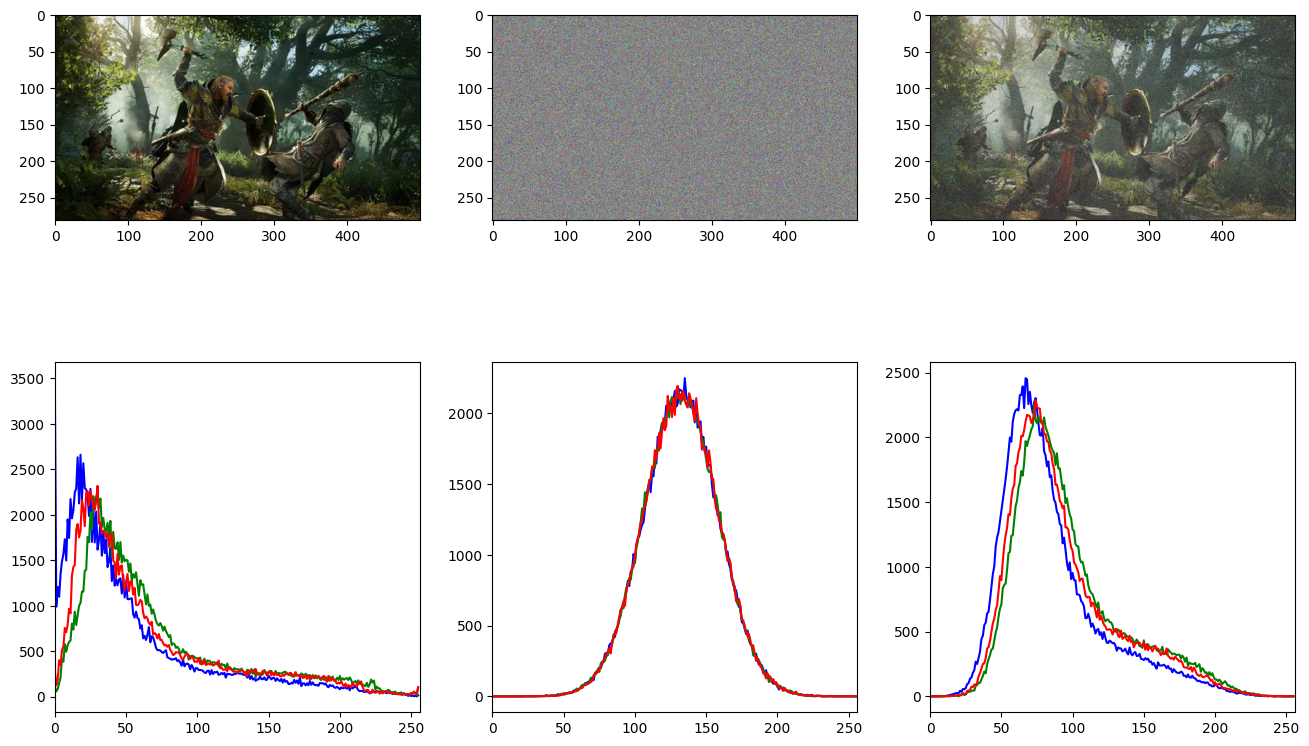

In [11]:
def plot_histogram(img, ax=None):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        if ax==None:
            plt.plot(hist, color=col)
        else:
            ax.plot(hist, color=col)
            ax.set_xlim([0, 256])

def normalize_img(img):
    return (img - img.min())/(img.max() - img.min())

img = cv2.imread(img_path, cv2.IMREAD_COLOR)

mu, std = 0, 20
noise = mu + std*np.random.normal(0, 1, img.shape)
print(f'Noise (min, max) = {noise.min():.2f}, {noise.max():.2f}')

img2 = cv2.add(img.astype('float'), noise)
print(f'Img2 (min, max) = {img2.min():.2f}, {img2.max():.2f}')

img2 = np.uint8(255*normalize_img(img2))
print(f'Img2 (min, max) = {img2.min():.2f}, {img2.max():.2f}')


# Plot results

# # Scale noise image for visualization purposes:
noise = np.uint8(255*normalize_img(noise))

fig, ax = plt.subplots(2,3)
fig.set_size_inches(16,10)

ax[0,0].imshow(bgr2rgb(img))
ax[0,1].imshow(bgr2rgb(noise))
ax[0,2].imshow(bgr2rgb(img2))

plot_histogram(img, ax[1,0])
plot_histogram(noise, ax[1,1])
plot_histogram(img2, ax[1,2])
plt.show()

### Adding salt & pepper noise to an image

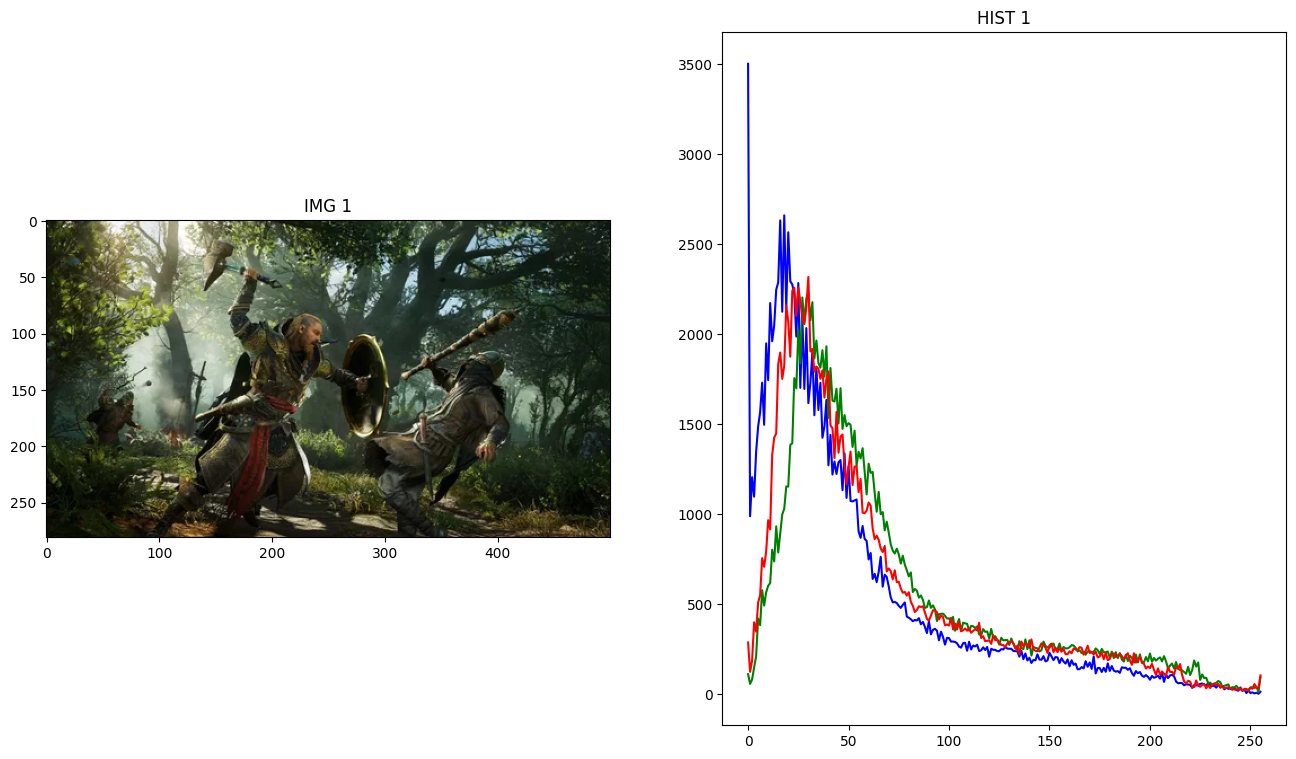

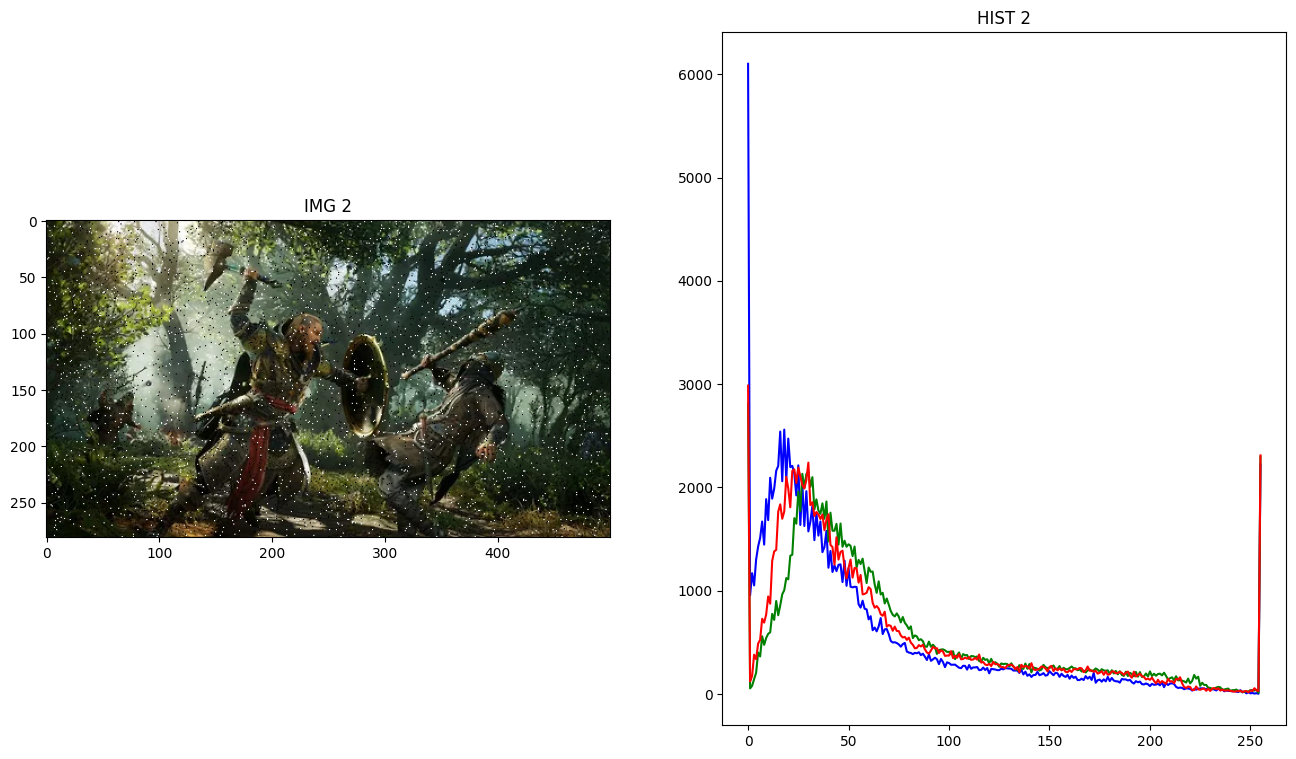

In [15]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

noise = np.zeros((img.shape[0], img.shape[1]), img.dtype)
cv2.randu(noise, 0, 255)
salt = noise > 250
pepper = noise < 5
img2 = img.copy()
img2[salt == True] = np.array([255, 255, 255])
img2[pepper == True] = np.array([0, 0, 0])

plt.figure(figsize=(16,9))
plt.subplot(121); plt.title('IMG 1');   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('HIST 1');  plot_histogram(img)
plt.show()

plt.figure(figsize=(16,9))
plt.subplot(121); plt.title('IMG 2');   plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('HIST 2');  plot_histogram(img2)
plt.show()